In [1]:
import scipy
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def rbf_kpca(X, gamma, n_components):
    # distancias cuadradas de cada pareja
    # del conjunto de datos, resulta una matriz MxN
    sq_dists = pdist(X, 'sqeuclidean')
    print(sq_dists.shape)
    #convertirla en matriz
    mat_sq_dists = squareform(sq_dists)
    print(mat_sq_dists.shape)
    # matriz de kernels
    K = np.exp(-gamma * mat_sq_dists)
    # centrar la matriz de kernels
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    #eigenpares: scipy.linalg.eigh devuelve lso eigenpares ordenados ascendentemente
    eigenvals, eigenvecs = eigh(K)
    eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1] # invertir el orden
    # elegir los k primeros eigenvecs
    alphas = np.column_stack([eigenvecs[:, i] for i in range(n_components)])
    # elegir los k primeros eigenvals
    lambdas = np.column_stack([eigenvals[i] for i in range(n_components)])
    return alphas, lambdas

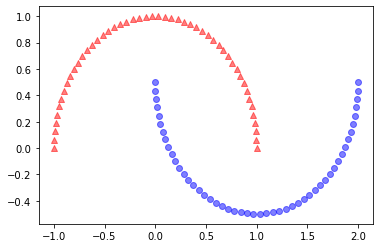

In [11]:
# medias lunas
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, random_state = 123)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

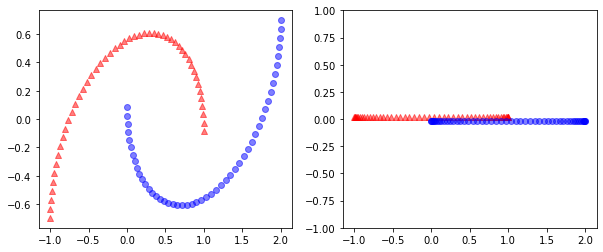

In [13]:
from IPython.core.pylabtools import figsize
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
ax[0].scatter(X[y == 0, 0], X_pca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X[y == 1, 0], X_pca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X[y == 0, 0], np.zeros((50, 1)) + 0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X[y == 1, 0], np.zeros((50, 1)) - 0.02, color = 'blue', marker = 'o', alpha = 0.5)
ax[1].set_ylim([-1, 1])
plt.show()

(4950,)
(100, 100)


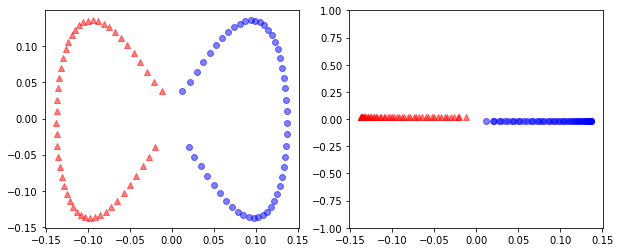

In [18]:
X_kpca, l = rbf_kpca(X, gamma = 15, n_components = 2)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((50, 1)) + 0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((50, 1)) - 0.02, color = 'blue', marker = 'o', alpha = 0.5)
ax[1].set_ylim([-1, 1])
plt.show()

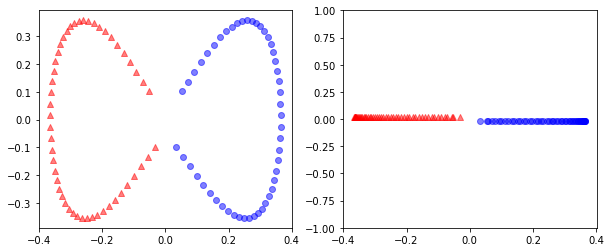

In [19]:
#KPCA de sklearn
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 15)
X_kpca = kpca.fit_transform(X)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((50, 1)) + 0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((50, 1)) - 0.02, color = 'blue', marker = 'o', alpha = 0.5)
ax[1].set_ylim([-1, 1])
plt.show()

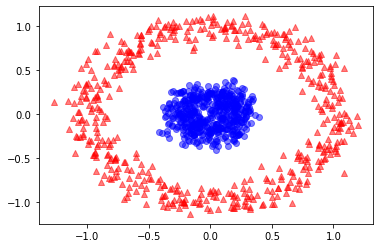

In [20]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples = 1000, random_state = 123, noise = 0.1, factor = 0.2)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)

ValueError: x and y must be the same size

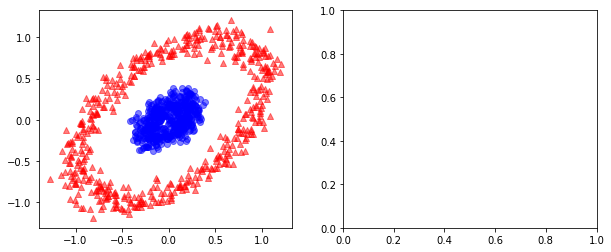

In [22]:
# con pca
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
ax[0].scatter(X[y == 0, 0], X_pca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X[y == 1, 0], X_pca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X[y == 0, 0], np.zeros((50, 1)) + 0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X[y == 1, 0], np.zeros((50, 1)) - 0.02, color = 'blue', marker = 'o', alpha = 0.5)
ax[1].set_ylim([-1, 1])
plt.show()

(499500,)
(1000, 1000)


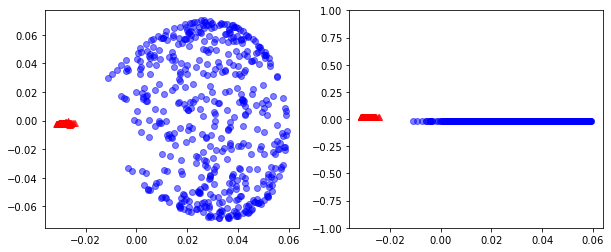

In [23]:
X_kpca, l = rbf_kpca(X, gamma = 15, n_components = 2)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02, color = 'blue', marker = 'o', alpha = 0.5)
ax[1].set_ylim([-1, 1])
plt.show()